Extract Data From API 

Successfully fetched weather data!
                  Time  Temperature Min (°C)  Temperature Max (°C)  \
0  2024-12-18 06:00:00                  5.64                  5.93   
1  2024-12-18 09:00:00                  6.57                  6.82   
2  2024-12-18 12:00:00                  9.12                  9.12   
3  2024-12-18 15:00:00                  7.00                  7.00   
4  2024-12-18 18:00:00                  5.74                  5.74   

   Temperature Mean (°C)  
0                   5.93  
1                   6.57  
2                   9.12  
3                   7.00  
4                   5.74  


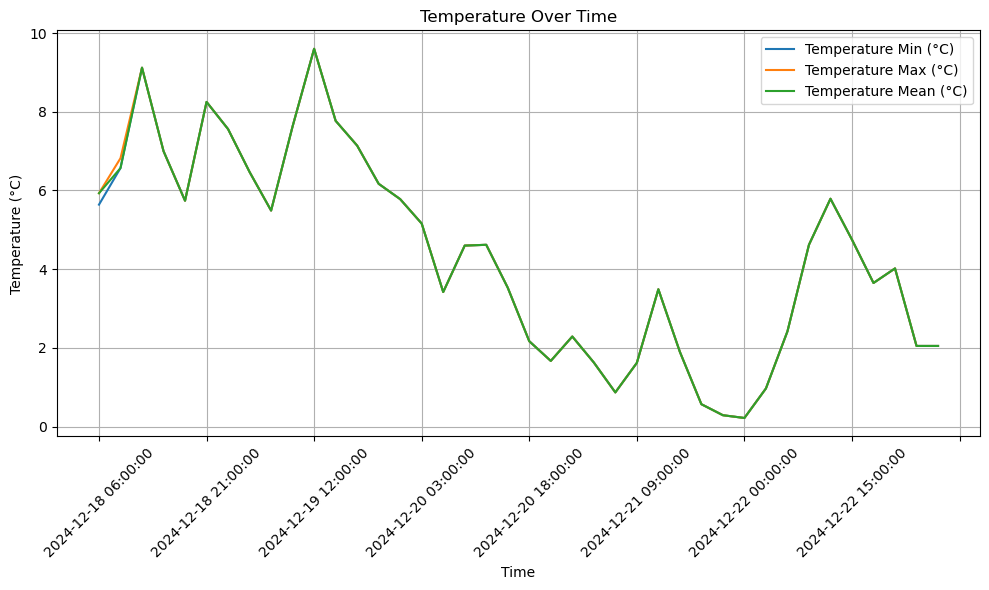

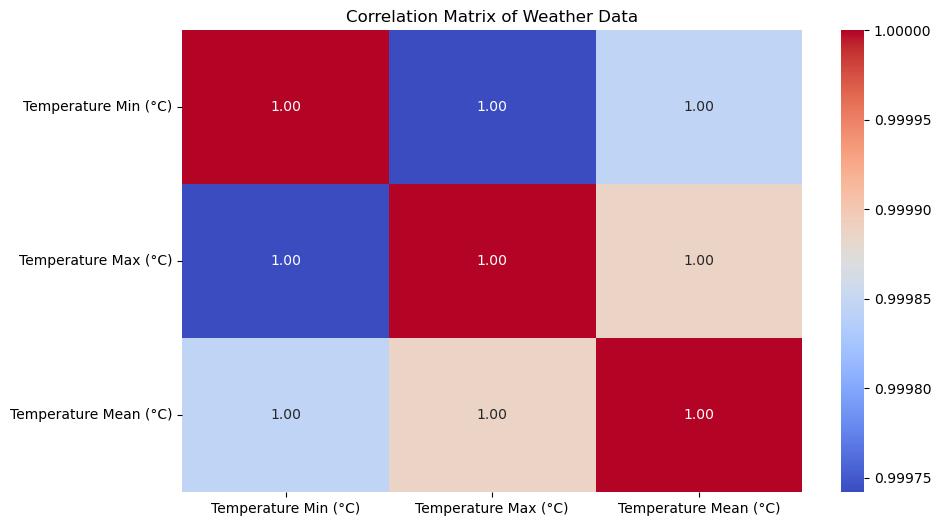

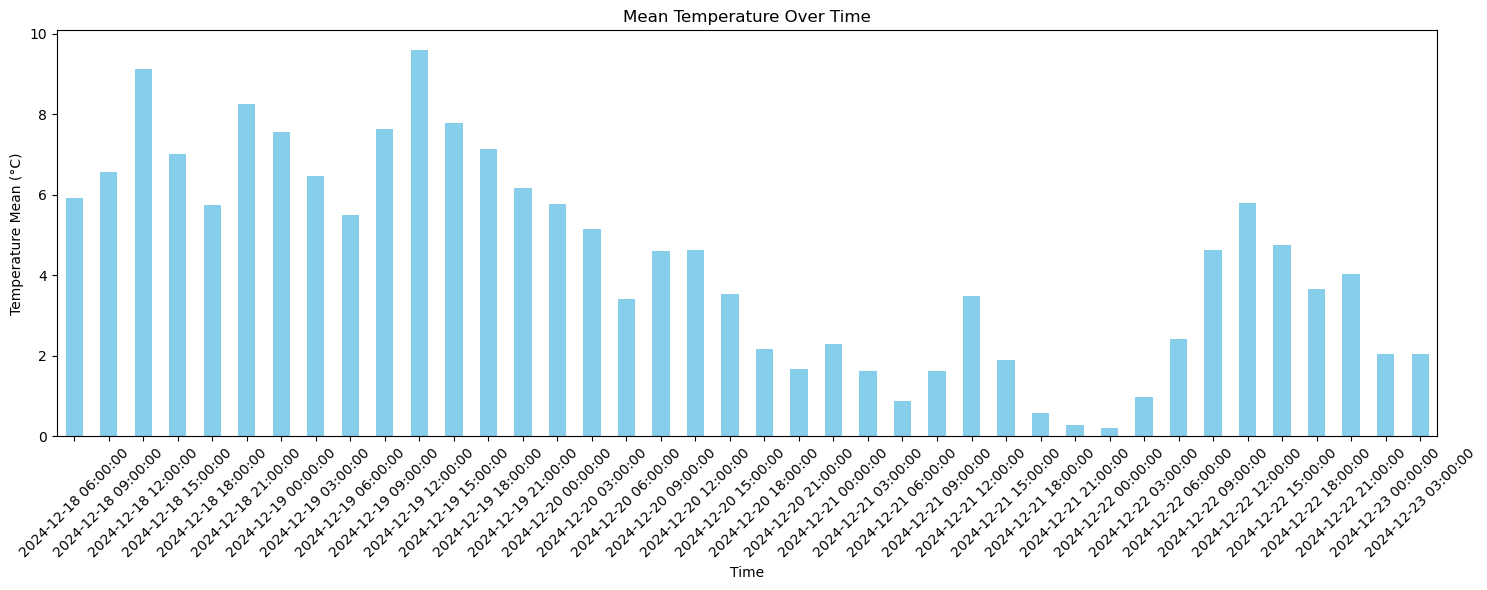

In [8]:

# import requests
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sb
# import key  # Ensure key.api_key is defined in the key.py file


# # Parent class: WeatherAPI (Encapsulation)
# class WeatherAPI:
#     def __init__(self, lat, lon, api_key):
#         self.lat = lat
#         self.lon = lon
#         self.api_key = api_key
#         self.url = 'https://api.openweathermap.org/data/2.5/forecast'

#     def gather_data(self):
#         params = {
#             'lat': self.lat,
#             'lon': self.lon,
#             'units': 'metric',  # Fetch data in metric units (Celsius)
#             'appid': self.api_key  # API key
#         }
#         response = requests.get(self.url, params=params)

#         if response.status_code == 200:
#             data = response.json()  # Parse JSON data
#             return data  # Return fetched data
#         else:
#             print(f'Failed to fetch data from the API. Status code: {response.status_code}, Error: {response.text}')
#             return None


# # Child class: EnhancedWeatherAPI (Inheritance)
# class EnhancedWeatherAPI(WeatherAPI):
#     def filter_data(self, data):
#         """Extract only the necessary weather data."""
#         forecast_list = data['list']
#         temperature_data = {
#             'Temperature Min (°C)': [entry['main']['temp_min'] for entry in forecast_list],
#             'Temperature Max (°C)': [entry['main']['temp_max'] for entry in forecast_list],
#             'Temperature Mean (°C)': [entry['main']['temp'] for entry in forecast_list]
#         }
#         return pd.DataFrame(temperature_data)  # Return as DataFrame


# # Data processor class: WeatherDataProcessor
# class WeatherDataProcessor:
#     @staticmethod
#     def plot_data(df):
#         """Plot weather data as a line chart."""
#         df.plot(figsize=(10, 6), title='Temperatures Over Time (°C)', grid=True)
#         plt.xlabel('Time (Index)')
#         plt.ylabel('Temperature (°C)')
#         plt.show()

#     @staticmethod
#     def correlation_heatmap(df):
#         """Generate a heatmap for correlations."""
#         corr_matrix = df.corr()
#         plt.figure(figsize=(10, 6))
#         sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
#         plt.title("Correlation Matrix of Weather Data")
#         plt.show()


# # Main application
# if __name__ == "__main__":
#     # Step 1: Initialize API
#     lat = 35
#     lon = 139
#     api_key = key.api_key  # Ensure your key.py file has a valid API key

#     # Step 2: Fetch weather data
#     weather_api = EnhancedWeatherAPI(lat, lon, api_key)
#     weather_data = weather_api.gather_data()

#     if weather_data:
#         print("Successfully fetched weather data!")

#         # Step 3: Process data
#         processor = WeatherDataProcessor()
#         df = weather_api.filter_data(weather_data)
#         print(df)

#         # Step 4: Visualizations
#         processor.plot_data(df)  # Line chart of temperatures
#         processor.correlation_heatmap(df)  # Heatmap of correlations
#     else:
#         print("Failed to fetch weather data.")


# Import necessary libraries
# Import necessary libraries
import requests  # For making API requests
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations (line and bar charts)
import seaborn as sb  # For creating advanced visualizations (e.g., heatmaps)
import key  # Custom module containing the API key (key.api_key)

# Parent class: WeatherAPI (Handles API interactions)
class WeatherAPI:
    # Initialize the class with latitude, longitude, API key, and API URL
    def __init__(self, lat, lon, api_key):
        self.lat = lat  # Latitude for the location
        self.lon = lon  # Longitude for the location
        self.api_key = api_key  # API key for authentication
        self.url = 'https://api.openweathermap.org/data/2.5/forecast'  # API endpoint

    # Method to fetch data from the Weather API
    def gather_data(self):
        """Fetch data from the Weather API."""
        # Parameters for the API request
        params = {
            'lat': self.lat,
            'lon': self.lon,
            'units': 'metric',  # Request data in Celsius units
            'appid': self.api_key  # API key for authentication
        }
        try:
            # Send GET request to the API
            response = requests.get(self.url, params=params)
            response.raise_for_status()  # Raise HTTPError for bad responses
            return response.json()  # Return JSON response as Python dictionary
        except requests.exceptions.RequestException as e:
            # Handle any request errors
            print(f"Error fetching data: {e}")
            return None  # Return None if an error occurs

# Child class: EnhancedWeatherAPI (Adds data filtering)
class EnhancedWeatherAPI(WeatherAPI):
    # Method to extract and filter relevant weather data
    def filter_data(self, data):
        """Extract relevant weather data and return as a DataFrame."""
        try:
            forecast_list = data['list']  # Extract the list of forecasts
            # Create a dictionary with relevant weather data
            weather_data = {
                'Time': [entry['dt_txt'] for entry in forecast_list],  # Extract time of forecast
                'Temperature Min (°C)': [entry['main']['temp_min'] for entry in forecast_list],  # Min temp
                'Temperature Max (°C)': [entry['main']['temp_max'] for entry in forecast_list],  # Max temp
                'Temperature Mean (°C)': [entry['main']['temp'] for entry in forecast_list]  # Mean temp
            }
            return pd.DataFrame(weather_data)  # Convert dictionary to DataFrame
        except KeyError as e:
            # Handle missing keys in the API response
            print(f"Data processing error: {e}")
            return pd.DataFrame()  # Return an empty DataFrame if an error occurs

# Utility class: WeatherDataProcessor (Handles visualizations and insights)
class WeatherDataProcessor:
    @staticmethod
    # Method to plot a line chart of weather data
    def plot_line_chart(df):
        """Plot weather data as a line chart."""
        if df.empty:
            print("No data available for plotting.")  # Handle empty DataFrame
            return
        # Plot temperature data with time as the x-axis
        df.set_index('Time')[['Temperature Min (°C)', 'Temperature Max (°C)', 'Temperature Mean (°C)']].plot(
            figsize=(10, 6), title='Temperature Over Time', grid=True
        )
        plt.xlabel('Time')  # Label x-axis
        plt.ylabel('Temperature (°C)')  # Label y-axis
        plt.xticks(rotation=45)  # Rotate x-axis labels for readability
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()

    @staticmethod
    # Method to plot a heatmap of temperature correlations
    def plot_correlation_heatmap(df):
        """Generate a heatmap for correlations."""
        if df.empty:
            print("No data available for correlation heatmap.")  # Handle empty DataFrame
            return
        # Compute correlation matrix and plot heatmap
        corr_matrix = df[['Temperature Min (°C)', 'Temperature Max (°C)', 'Temperature Mean (°C)']].corr()
        plt.figure(figsize=(10, 6))
        sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")  # Display correlations
        plt.title("Correlation Matrix of Weather Data")  # Title for the heatmap
        plt.show()

    @staticmethod
    # Method to plot a bar chart of mean temperatures
    def plot_bar_chart(df):
        """Create a bar chart for temperature variations."""
        if df.empty:
            print("No data available for bar chart.")  # Handle empty DataFrame
            return
        # Plot bar chart with mean temperatures over time
        df.set_index('Time')['Temperature Mean (°C)'].plot.bar(
            figsize=(15, 6), color='skyblue', title='Mean Temperature Over Time'
        )
        plt.xlabel('Time')  # Label x-axis
        plt.ylabel('Temperature Mean (°C)')  # Label y-axis
        plt.xticks(rotation=45)  # Rotate x-axis labels for readability
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()

# Main application
if __name__ == "__main__":
    # Step 1: Initialize API with user input for location
    lat = float(input("Enter latitude: "))  # Allow user to input latitude
    lon = float(input("Enter longitude: "))  # Allow user to input longitude
    api_key = key.api_key  # Load API key securely

    # Step 2: Fetch weather data using EnhancedWeatherAPI
    weather_api = EnhancedWeatherAPI(lat, lon, api_key)
    weather_data = weather_api.gather_data()

    if weather_data:
        print("Successfully fetched weather data!")  # Indicate success

        # Step 3: Process and display weather data
        processor = WeatherDataProcessor()  # Instantiate data processor
        df = weather_api.filter_data(weather_data)  # Filter data into DataFrame
        print(df.head())  # Show the first few rows of the DataFrame

        # Step 4: Generate visualizations
        processor.plot_line_chart(df)  # Line chart for temperatures
        processor.plot_correlation_heatmap(df)  # Heatmap for correlations
        processor.plot_bar_chart(df)  # Bar chart for mean temperatures
    else:
        print("Failed to fetch weather data.")  # Indicate failure if API call fails

